# KF6 - Gamma Spectroscopy


## Table of Content

* [Read experimental data from file](#read)
    * [Loading spectra taken by NaI(Tl) detector](#read_na)
    * [Loading spectra taken by HPGe detector ](#read_ge)

* [Analyzing the data](#fit)
    * [Task 1: Energy calibration of the NaI(Tl) and HPGe detectors](#calibration)
    * [Task 2: Main features of $\gamma$-spectra](#features)
    * [Task 3: Full width at half maximum (FWHM) as a function of a $\gamma$-ray energy](#fwhm)
    * [Task 4: $^{22}$Na $\gamma$-spectrum and relative peak intensity](#na22)
    * [Task 5: $^{137}$Cs and the internal conversion coefficient of $^{137}$Ba](#internal)
    * [Task 6: Binding energy of the deuteron](#deuteron)
    * [Task 7: Background radiation ](#background)

### Importing python packages <a name="import"></a>

In [1]:
#This code cell holds useful code needed for the analysis. Execute it like normal.
# Packages to help importing files 
import sys, os
sys.path.append('./lib')

# Package that supports working with large arrays
import numpy as np  

# Package for plotting 
import matplotlib   # choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib notebook

from pylab import *
from scipy.optimize import curve_fit
from scipy import odr

# The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt
SMALL_SIZE = 8
matplotlib.rc('font', size=10)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

# Function that fits a curve to data 
from scipy.optimize import curve_fit

# Custom pakages prepared for you to analyze experimental data from labs.
# The code is located in the 'lib' subfolder which we have to specify:
sys.path.append('./lib')
import MCA, fittingFunctions
from uncertainties import ufloat

# Package to create interactive plots
# Only needed in this demo!
from ipywidgets import interact, interactive, fixed, widgets, Button, Layout

# comment this line in if you prefer to use the full width of the display:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

----------------------------------------------------------------------------------------------------------

# Reading experimental data <a name="read"></a>

## Loading spectra taken by NaI(Tl) detector <a name="read_na"></a>

With the help of the function `load_spectrum` from package `MCA` one can read the experimental data from one data file as follows:

In [2]:
#Load your data files here:
Co60_NaI  = MCA.load_spectrum("Gamma_data\\Co60NaI.Spe")
Cs137_NaI = MCA.load_spectrum("Gamma_data\\Cs137NaI.Spe")
Na22_NaI  = MCA.load_spectrum("Gamma_data\\Na22NaI.Spe")

## Loading spectra taken by HPGe detector <a name="read_ge"></a>

In [3]:
#Load your data files here:
Co60_Ge  = MCA.load_spectrum("Gamma_data\\Co60Ge.Spe")
Cs137_Ge = MCA.load_spectrum("Gamma_data\\Cs137Ge.Spe")
Na22_Ge  = MCA.load_spectrum("Gamma_data\\Na22Ge.Spe")
Cf252_Ge = MCA.load_spectrum("Gamma_data\\Cf252-2.Spe")

----------------------------------------------------------------------------------------------------------

# Analyzing the data <a name="fit"></a>

Many help functions have been implemented to help you analyze the data from the lab and the code is stored in [MCA.py](./lib/MCA.py) and [fittingFunctions.py](./lib/fittingFunctions.py). Run [Intro_notebook.ipynb](./Intro_notebook.ipynb) to see loads of examples on how to use the code that we implemented for you for analyzing your data from the gamma lab. Feel free to copy paste cells from the notebook and use them for your analysis.

## Task 1: Energy calibration of the NaI(Tl) and HPGe detectors<a name="calibration"></a>

# Co60 NaI

<IPython.core.display.Javascript object>


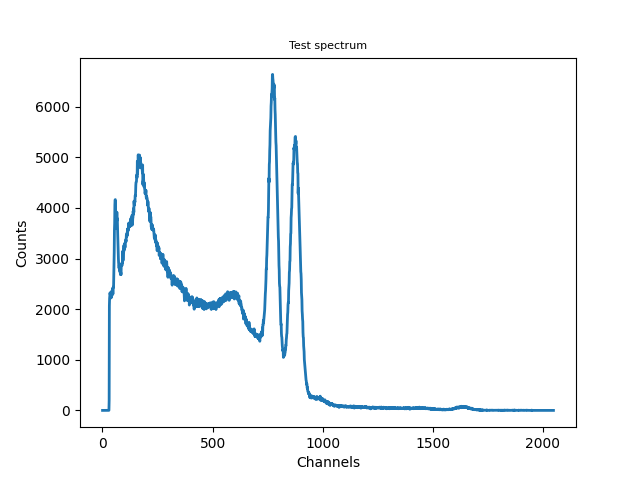

Text(0, 0.5, 'Counts')

In [4]:

#Plotting the data
plt.figure()
# with the data read in with the first routine
xval = Co60_NaI.bin_centers
yval = Co60_NaI.counts
plt.plot(xval, yval, lw=2)

plt.title("Test spectrum") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 

<IPython.core.display.Javascript object>


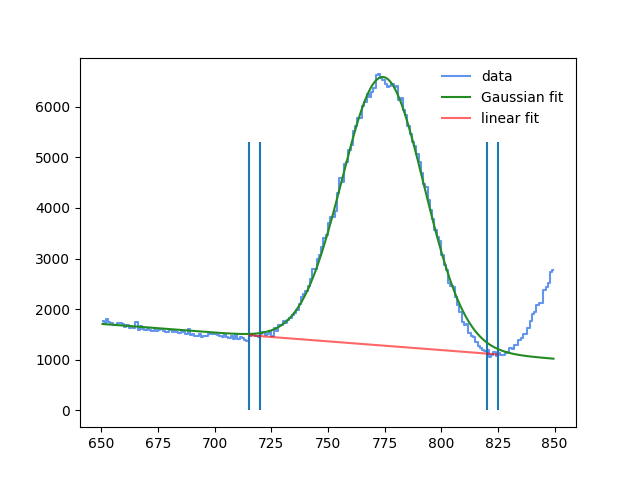

Estimated parameters:
 A = 5307.05021, mu = 774.30690,  sigma = 18.12826 

Uncertainties in the estimated parameters: 
 σ²(A) = 4659.72217, σ²(mu) = 0.07249, σ²(sigma) = 0.07249 

Covariance matrix: 
 [[ 4.65972217e+03  4.05515996e-06 -1.06113505e+01]
 [ 4.05515996e-06  7.24939571e-02 -3.61701570e-09]
 [-1.06113505e+01 -3.61701570e-09  7.24940348e-02]]


<IPython.core.display.Javascript object>


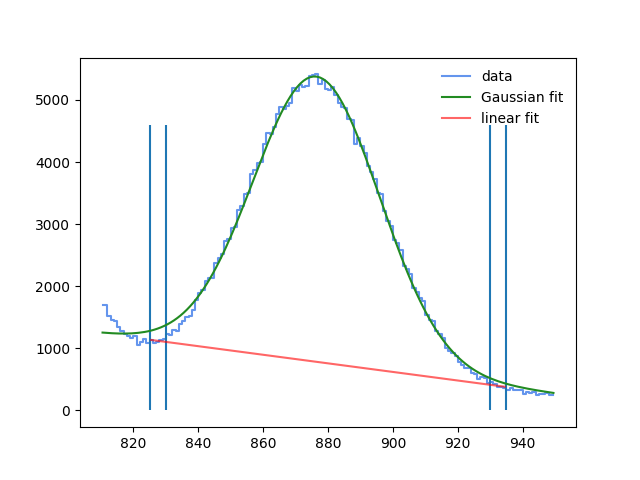

Estimated parameters:
 A = 4594.22336, mu = 876.44357,  sigma = 19.50344 

Uncertainties in the estimated parameters: 
 σ²(A) = 523.95806, σ²(mu) = 0.01259, σ²(sigma) = 0.01259 

Covariance matrix: 
 [[ 5.23958059e+02  7.77226495e-05 -1.48307794e+00]
 [ 7.77226495e-05  1.25893669e-02 -7.15379960e-07]
 [-1.48307794e+00 -7.15379960e-07  1.25920501e-02]]


In [5]:
#Fit for the first peak
Co60peak1 = fittingFunctions.perform_Gaussian_fit(x = Co60_NaI.bin_centers, 
                                              y = Co60_NaI.counts,
                                              # region to use
                                              region_start = 650, 
                                              region_stop = 850,
                                              # initial guesses
                                              mu_guess = 770, 
                                              A_guess = 6000, 
                                              sigma_guess = 10,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [715, 720], 
                                              right_selection = [820, 825])

Co60peak2 = fittingFunctions.perform_Gaussian_fit(x = Co60_NaI.bin_centers, 
                                              y = Co60_NaI.counts,
                                              # region to use
                                              region_start = 810, 
                                              region_stop = 950,
                                              # initial guesses
                                              mu_guess = 875, 
                                              A_guess = 5000, 
                                              sigma_guess = 10,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [825, 830], 
                                              right_selection = [930, 935])

# Cs137 NaI

<IPython.core.display.Javascript object>


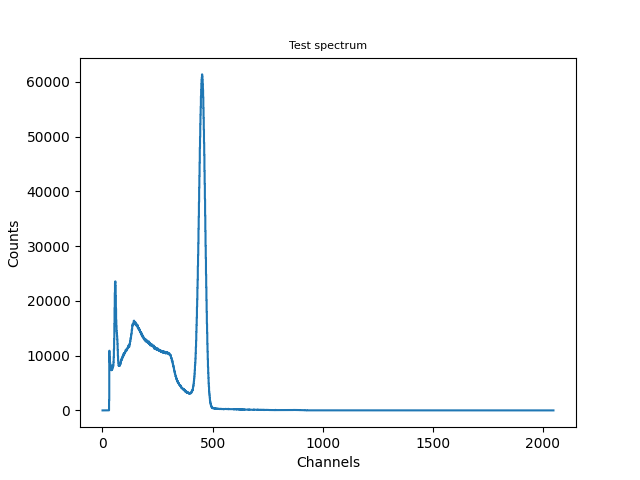

Text(0, 0.5, 'Counts')

In [6]:
#Plotting the Cs137_NaI 
plt.figure()
# with the data read in with the first routine
plt.step(Cs137_NaI .bin_centers, Cs137_NaI .counts, where='mid')

plt.title("Test spectrum") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 

<IPython.core.display.Javascript object>


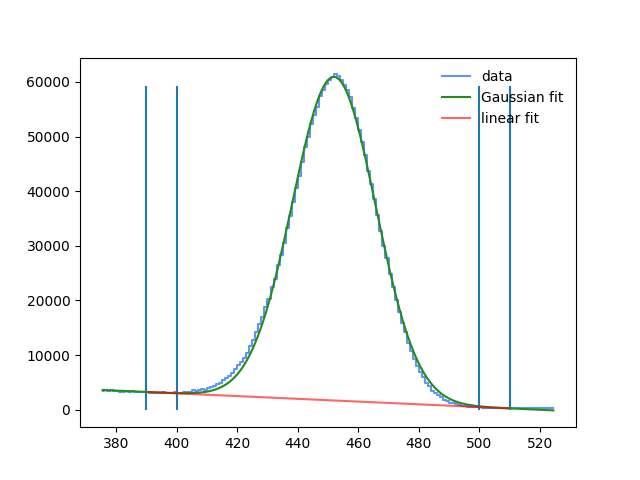

Estimated parameters:
 A = 59232.45901, mu = 452.00104,  sigma = 13.76435 

Uncertainties in the estimated parameters: 
 σ²(A) = 23703.21628, σ²(mu) = 0.00171, σ²(sigma) = 0.00171 

Covariance matrix: 
 [[ 2.37032163e+04  1.79623836e-06 -3.67207926e+00]
 [ 1.79623836e-06  1.70662488e-03 -4.17030792e-10]
 [-3.67207926e+00 -4.17030792e-10  1.70662489e-03]]


In [7]:
#Fit for the first peak
Cs137peak = fittingFunctions.perform_Gaussian_fit(x = Cs137_NaI.bin_centers, 
                                              y = Cs137_NaI .counts,
                                              # region to use
                                              region_start = 375, 
                                              region_stop = 525,
                                              # initial guesses
                                              mu_guess = 450, 
                                              A_guess = 60000, 
                                              sigma_guess = 5,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [390, 400], 
                                              right_selection = [500, 510])

# Na22 NaI

<IPython.core.display.Javascript object>


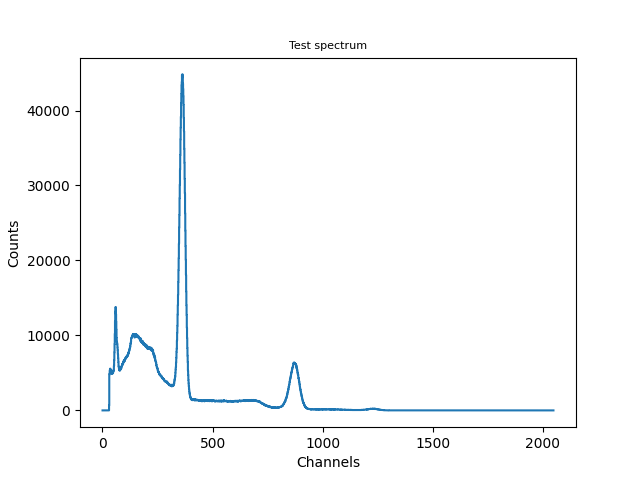

Text(0, 0.5, 'Counts')

In [8]:
#Plotting the Na22_NaI
plt.figure()
# with the data read in with the first routine
plt.step(Na22_NaI.bin_centers, Na22_NaI.counts, where='mid')

plt.title("Test spectrum") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 


<IPython.core.display.Javascript object>


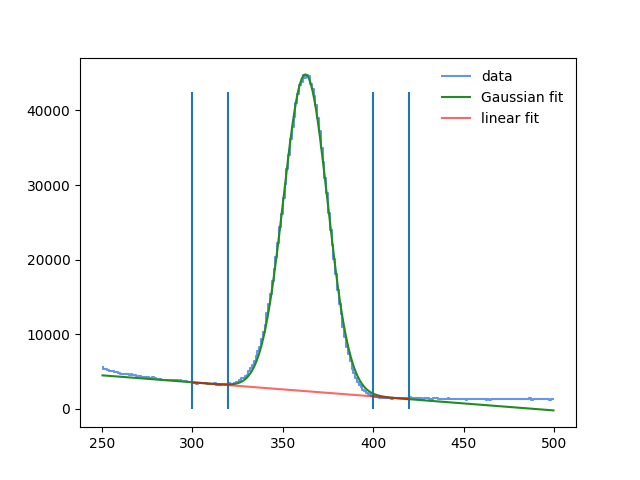

Estimated parameters:
 A = 42480.17144, mu = 362.58291,  sigma = 12.12041 

Uncertainties in the estimated parameters: 
 σ²(A) = 25544.13174, σ²(mu) = 0.00277, σ²(sigma) = 0.00277 

Covariance matrix: 
 [[ 2.55441317e+04  2.16885705e-06 -4.85877631e+00]
 [ 2.16885705e-06  2.77257897e-03 -6.16187030e-10]
 [-4.85877631e+00 -6.16187030e-10  2.77257899e-03]]


<IPython.core.display.Javascript object>


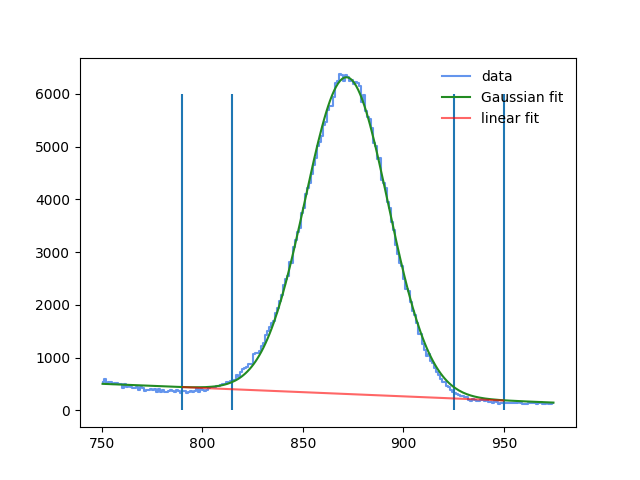

Estimated parameters:
 A = 6002.21773, mu = 871.72622,  sigma = 20.65133 

Uncertainties in the estimated parameters: 
 σ²(A) = 245.41640, σ²(mu) = 0.00387, σ²(sigma) = 0.00387 

Covariance matrix: 
 [[ 2.45416396e+02  3.54189255e-07 -5.62922401e-01]
 [ 3.54189255e-07  3.87359979e-03 -1.21883796e-09]
 [-5.62922401e-01 -1.21883796e-09  3.87359981e-03]]


In [9]:
#Fit for the first peak
Na22peak1 = fittingFunctions.perform_Gaussian_fit(x = Na22_NaI.bin_centers, 
                                              y = Na22_NaI.counts,
                                              # region to use
                                              region_start = 250, 
                                              region_stop = 500,
                                              # initial guesses
                                              mu_guess = 375, 
                                              A_guess = 40000, 
                                              sigma_guess = 10,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [300, 320], 
                                              right_selection = [400, 420])

#Fit for the second peak
Na22peak2 = fittingFunctions.perform_Gaussian_fit(x = Na22_NaI.bin_centers, 
                                              y = Na22_NaI.counts,
                                              # region to use
                                              region_start = 750, 
                                              region_stop = 975,
                                              # initial guesses
                                              mu_guess = 875, 
                                              A_guess = 6000, 
                                              sigma_guess = 15,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [790, 815], 
                                              right_selection = [925, 950])


[511.0, 661.6, 1173.2, 1274.5, 1332.5] [0.1, 0.1, 0.1, 0.1, 0.1]
fit parameter 1-sigma error
———————————–
-42.65 +/-  32.93
  1.54 +/-   0.05

a = -43(33)
b = 1.54(5)
E = 308(35)


<IPython.core.display.Javascript object>


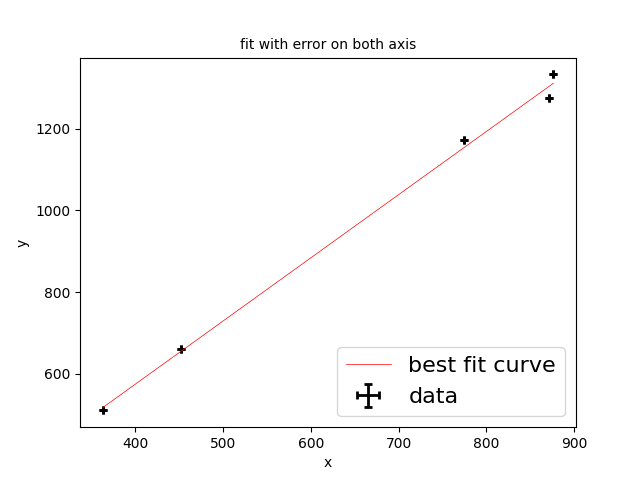

In [10]:
#Calibration for NaI detector

from uncertainties import ufloat_fromstr

y_i = [
    ufloat_fromstr("511.0"),
    ufloat_fromstr("661.6"),
    ufloat_fromstr("1173.2"),
    ufloat_fromstr("1274.5"),
    ufloat_fromstr("1332.5"),
]
x_i = [
    ufloat_fromstr("362.58291+/-0.00277"),
    ufloat_fromstr("452.00104+/-0.00171"),
    ufloat_fromstr("774.30690+/-0.07249"),
    ufloat_fromstr("871.72622+/-0.00387"),
    ufloat_fromstr("876.44357+/-0.01259"),
]

y  = [ i.n for i in y_i ] # n -> nominal value
dy = [ i.s for i in y_i ] # s -> standard deviation
print(y,dy)
x  = [ i.n for i in x_i ] # n -> nominal value
dx = [ i.s for i in x_i ] # s -> standard deviation

import numpy as np
from pylab import *
from scipy.optimize import curve_fit
from scipy import odr

def func(p, x):
    "function to fit"
    a, b = p
    return a + b*x

# Model object
quad_model = odr.Model(func)

# Create a RealData object
data = odr.RealData(x, y, sx=dx, sy=dy)

# Set up ODR with the model and data.
odr = odr.ODR(data, quad_model, beta0=[0., 1.]) # initial guess of parameters

# Run the regression.
out = odr.run()

#print fit parameters and 1-sigma estimates
popt = out.beta
perr = out.sd_beta
print('fit parameter 1-sigma error')
print('———————————–')
for i in range(len(popt)):
    print("{:6.2f} +/- {:6.2f}".format(popt[i], perr[i]))
print()
    
a = ufloat(popt[0],perr[0])
b = ufloat(popt[1],perr[1])
print("a = {:uS}".format(a))
print("b = {:uS}".format(b))

ch = ufloat_fromstr("227.3(8)")
E = a + ch*b
print("E = {:uS}".format(E))

# prepare confidence level curves
nstd = 5. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

x_fit = np.linspace(min(x), max(x), 100)
fit = func(popt, x_fit)
#fit_up = func(popt_up, x_fit)
#fit_dw = func(popt_dw, x_fit)

#plot
fig, ax = plt.subplots(1)
xlabel('x')
ylabel('y')
title('fit with error on both axis', fontsize=10)
## plot points with errors in both axes
errorbar(x, y, yerr=dy, xerr=dx, ecolor='k', fmt='none', label='data', elinewidth=2, capsize=3, capthick=2 )
## plot line corresponding to fit
plot(x_fit, fit, 'r', lw=0.5, label='best fit curve')
## color a 5 sigma region to the fit 
#ax.fill_between(x_fit, fit_up, fit_dw, alpha=.25, label='5-sigma interval')
legend(loc='lower right',fontsize=16)
show()
## OBS: 5-sigma thickness is comparable/smaller with best fit sigma

In [28]:
def calibrate(data):
    bins = [x*b + a for x in data]
    return bins

<IPython.core.display.Javascript object>


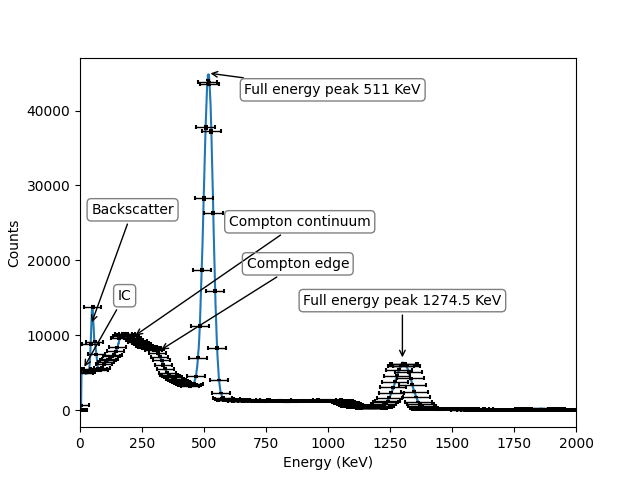

In [12]:
Na22NaIbins = calibrate(Na22_NaI.bin_centers)
xval = [x.n for x in Na22NaIbins]
xerr = [x.s for x in Na22NaIbins]
yval = Na22_NaI.counts
yerr = [np.sqrt(x) for x in Na22_NaI.counts]
plt.figure()
plt.plot(xval, yval)
plt.errorbar(xval[::5], yval[::5], xerr=xerr[::5], yerr=yerr[::5], ecolor='k', fmt='none', label='data', elinewidth=1, capsize=1.5, capthick=1.5 )
plt.xlabel('Energy (KeV)')
plt.ylabel('Counts')
plt.annotate("Full energy peak 1274.5 KeV", xy=(1300, 6700),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(0, +40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Full energy peak 511 KeV", xy=(515, 45000),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+90, -15), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton continuum", xy=(214, 9800),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(120, +80), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton edge", xy=(318, 7900),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(100, +60), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Backscatter", xy=(44, 11400),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+30, +80), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("IC", xy=(12, 5500),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+30, +50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.xlim(0,2000)
plt.show()

<IPython.core.display.Javascript object>


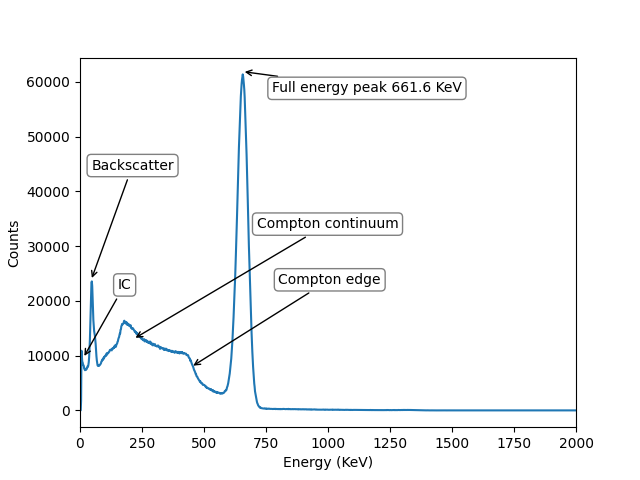

In [29]:

Cs137NaIbins = calibrate(Cs137_NaI.bin_centers)
xval = [x.n for x in Cs137NaIbins]
xerr = [x.s for x in Cs137NaIbins]
yval = Cs137_NaI.counts
yerr = [np.sqrt(x) for x in Cs137_NaI.counts]
plt.figure()
plt.plot(xval, yval)
#plt.errorbar(xval[::5], yval[::5], xerr=xerr[::5], yerr=yerr[::5], ecolor='k', fmt='none', label='data', elinewidth=1, capsize=1.5, capthick=1.5 )
plt.xlabel('Energy (KeV)')
plt.ylabel('Counts')
plt.annotate("Full energy peak 661.6 KeV", xy=(653, 61900),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+90, -15), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton continuum", xy=(214, 13000),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(140, +80), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton edge", xy=(447, 7900),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(100, +60), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Backscatter", xy=(44, 23700),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+30, +80), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("IC", xy=(12, 9500),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+30, +50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.xlim(0,2000)
plt.show()

<IPython.core.display.Javascript object>


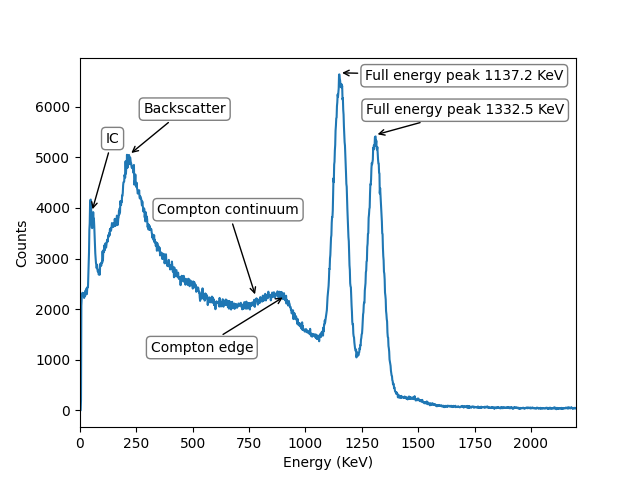

In [30]:
Co60NaIbins = calibrate(Co60_NaI.bin_centers)
xval = [x.n for x in Co60NaIbins]
xerr = [x.s for x in Co60NaIbins]
yval = Co60_NaI.counts
yerr = [np.sqrt(x) for x in Co60_NaI.counts]
plt.figure()
plt.plot(xval, yval)
#plt.errorbar(xval[::5], yval[::5], xerr=xerr[::5], yerr=yerr[::5], ecolor='k', fmt='none', label='data', elinewidth=1, capsize=1.5, capthick=1.5 )
plt.xlabel('Energy (KeV)')
plt.ylabel('Counts')
plt.annotate("Full energy peak 1137.2 KeV", xy=(1150, 6670),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+90, -5), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Full energy peak 1332.5 KeV", xy=(1308, 5440),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+65, +15), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton continuum", xy=(780, 2240),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-20, +60), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton edge", xy=(910, 2260),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-60, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Backscatter", xy=(218, 5050),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+40, +30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("IC", xy=(52, 3920),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+15, +50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.xlim(0,2200)
plt.show()

fit parameter 1-sigma error
———————————–
-10.24 +/-   0.16
  0.38 +/-   0.00

a = -43(33)
b = 1.54(5)
E = 75.72(34)


<IPython.core.display.Javascript object>


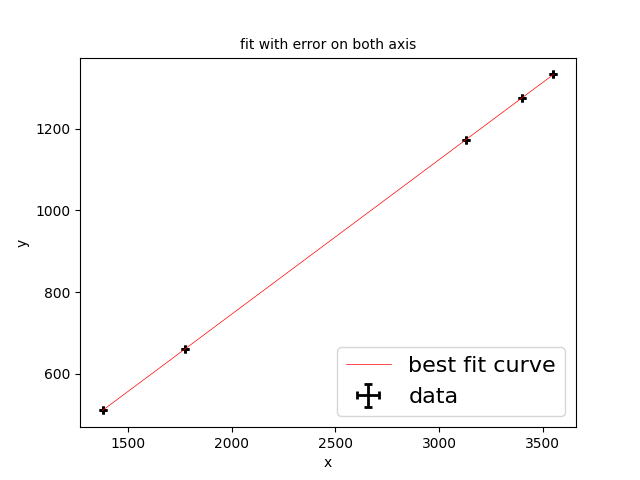

In [15]:
#Calibration for NaI detector

from uncertainties import ufloat_fromstr

y_i = [
    ufloat_fromstr("511.0"),
    ufloat_fromstr("661.6"),
    ufloat_fromstr("1173.2"),
    ufloat_fromstr("1274.5"),
    ufloat_fromstr("1332.5"),
]
x_i = [
    ufloat_fromstr("1378.11926+/-0.00004"),
    ufloat_fromstr("1776.97093+/-0.00013"),
    ufloat_fromstr("3129.82318+/-0.02044"),
    ufloat_fromstr("3397.25291+/-0.00094"),
    ufloat_fromstr("3550.80314+/-0.00895"),
]

y  = [ i.n for i in y_i ] # n -> nominal value
dy = [ i.s for i in y_i ] # s -> standard deviation

x  = [ i.n for i in x_i ] # n -> nominal value
dx = [ i.s for i in x_i ] # s -> standard deviation

import numpy as np
from pylab import *
from scipy.optimize import curve_fit
from scipy import odr

def func(p, x):
    "function to fit"
    c, d = p
    return c + d*x

# Model object
quad_model = odr.Model(func)

# Create a RealData object
data = odr.RealData(x, y, sx=dx, sy=dy)

# Set up ODR with the model and data.
odr = odr.ODR(data, quad_model, beta0=[0., 1.]) # initial guess of parameters

# Run the regression.
out = odr.run()

#print fit parameters and 1-sigma estimates
popt = out.beta
perr = out.sd_beta
print('fit parameter 1-sigma error')
print('———————————–')
for i in range(len(popt)):
    print("{:6.2f} +/- {:6.2f}".format(popt[i], perr[i]))
print()
    
c = ufloat(popt[0],perr[0])
d = ufloat(popt[1],perr[1])
print("a = {:uS}".format(a))
print("b = {:uS}".format(b))

ch = ufloat_fromstr("227.3(8)")
E = c + ch*d
print("E = {:uS}".format(E))

# prepare confidence level curves
nstd = 5. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

x_fit = np.linspace(min(x), max(x), 100)
fit = func(popt, x_fit)
#fit_up = func(popt_up, x_fit)
#fit_dw = func(popt_dw, x_fit)

#plot
fig, ax = plt.subplots(1)
xlabel('x')
ylabel('y')
title('fit with error on both axis', fontsize=10)
## plot points with errors in both axes
errorbar(x, y, yerr=dy, xerr=dx, ecolor='k', fmt='none', label='data', elinewidth=2, capsize=3, capthick=2 )
## plot line corresponding to fit
plot(x_fit, fit, 'r', lw=0.5, label='best fit curve')
## color a 5 sigma region to the fit 
#ax.fill_between(x_fit, fit_up, fit_dw, alpha=.25, label='5-sigma interval')
legend(loc='lower right',fontsize=16)
show()
## OBS: 5-sigma thickness is comparable/smaller with best fit sigma

In [16]:
def calibrate(data):
    bins = [x*d + c for x in data]
    return bins

<IPython.core.display.Javascript object>


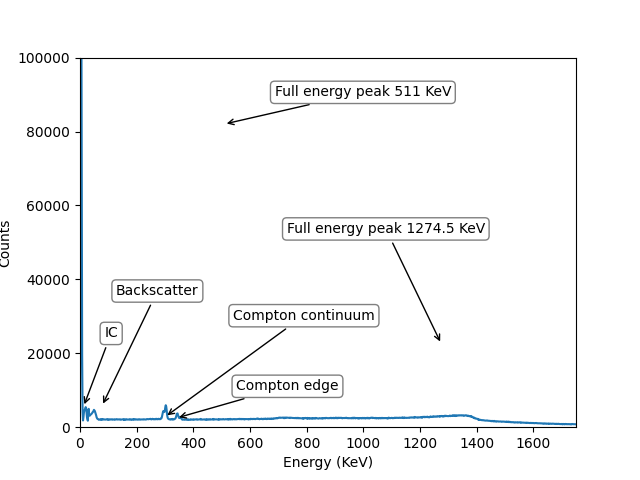

In [31]:
Na22Gebins = calibrate(Na22_Ge.bin_centers)
xval = [x.n for x in Na22Gebins]
xerr = [x.s for x in Na22Gebins]
yval = Na22_Ge.counts
yerr = [np.sqrt(x) for x in Na22_Ge.counts]
plt.figure()
plt.plot(xval, yval)
#plt.errorbar(xval[::5], yval[::5], xerr=xerr[::5], yerr=yerr[::5], ecolor='k', fmt='none', label='data', elinewidth=1, capsize=1.5, capthick=1.5 )
plt.xlabel('Energy (KeV)')
plt.ylabel('Counts')
plt.annotate("Full energy peak 1274.5 KeV", xy=(1275, 22500),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-40, 80), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Full energy peak 511 KeV", xy=(508, 82000),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+100, +20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton continuum", xy=(300, 2780),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(100, +70), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton edge", xy=(340, 2470),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(80, +20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Backscatter", xy=(77, 5700),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+40, +80), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("IC", xy=(12, 5500),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+20, +50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.xlim(0,1750)
plt.ylim(0,100000)
plt.show()

<IPython.core.display.Javascript object>


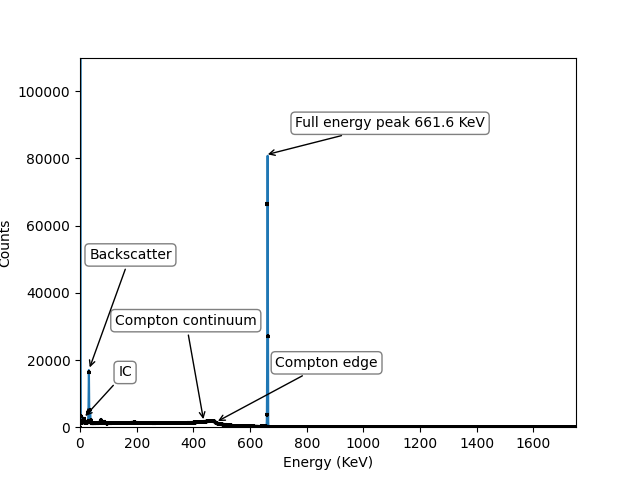

In [18]:
Cs137Gebins = calibrate(Cs137_Ge.bin_centers)
xval = [x.n for x in Cs137Gebins]
xerr = [x.s for x in Cs137Gebins]
yval = Cs137_Ge.counts
yerr = [np.sqrt(x) for x in Cs137_Ge.counts]
plt.figure()
plt.plot(xval, yval)
plt.errorbar(xval[::5], yval[::5], xerr=xerr[::5], yerr=yerr[::5], ecolor='k', fmt='none', label='data', elinewidth=1, capsize=1.5, capthick=1.5 )
plt.xlabel('Energy (KeV)')
plt.ylabel('Counts')
plt.annotate("Full energy peak 661.6 KeV", xy=(653, 81000),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+90, +20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton continuum", xy=(437, 1580),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-13, +70), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Compton edge", xy=(478, 1430),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(80, +40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Backscatter", xy=(31, 17000),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+30, +80), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("IC", xy=(12, 2700),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+30, +30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.xlim(0,1750)
plt.ylim(0,110000)
plt.show()

<IPython.core.display.Javascript object>


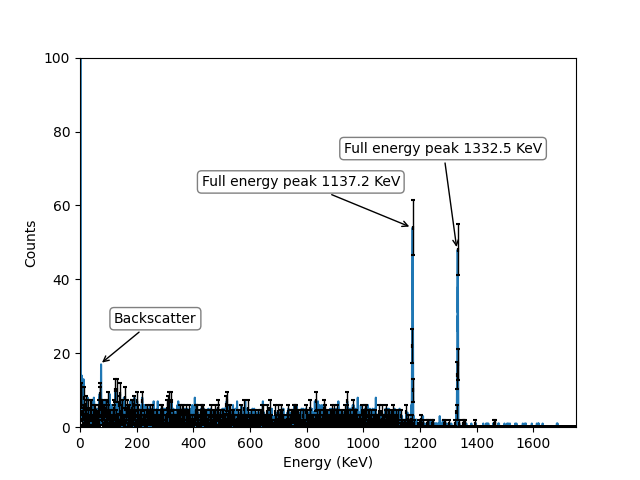

In [24]:
Co60Gebins = calibrate(Co60_Ge.bin_centers)
xval = [x.n for x in Co60Gebins]
xerr = [x.s for x in Co60Gebins]
yval = Co60_Ge.counts
yerr = [np.sqrt(x) for x in Co60_Ge.counts]
plt.figure()
plt.plot(xval, yval)
plt.errorbar(xval[::5], yval[::5], xerr=xerr[::5], yerr=yerr[::5], ecolor='k', fmt='none', label='data', elinewidth=1, capsize=1.5, capthick=1.5 )
plt.xlabel('Energy (KeV)')
plt.ylabel('Counts')
plt.annotate("Full energy peak 1137.2 KeV", xy=(1171, 54),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-80, +30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Full energy peak 1332.5 KeV", xy=(1330, 48),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-10, +70), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.annotate("Backscatter", xy=(70, 17),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(+40, +30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
plt.xlim(0,1750)
plt.ylim(0,100)
plt.show()

## Task 3: Full width at half maximum (FWHM) as a function of a $\gamma$-ray energy <a name="fwhm"></a>

In [ ]:
### your code goes here 





## Task 4: $^{22}$Na $\gamma$-spectrum and relative peak intensity <a name="na22"></a>

In [ ]:
### your code goes here 





## Task 5: $^{137}$Cs and the internal conversion coefficient of $^{137}$Ba <a name="internal"></a>

In [ ]:
### your code goes here 





## Task 6: Binding energy of the deuteron <a name="deuteron"></a>

In [ ]:
### your code goes here 





## Task 7: Background radiation <a name="background"></a>

The background spectrum that is to be analysed as a part of the lab is named
`background_analysis.csv` and can be found in the current folder. This spectrum
has been measured with another detector and is already calibrated. 

The spectrum can be read with the help of `MCA.py` as following:

In [ ]:
background = MCA.load_calibrated_spectrum("Gamma_data/Background.txt")

In [ ]:
### your code goes here 



